<a href="https://colab.research.google.com/github/sharan11/Intro-to-Deep-Learning-with-Pytorch-Exercise-Solutions/blob/master/Saving_and_Loading_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Saving and Loading Models
In this notebook, I'll show you how to save and load models with PyTorch. This is important because you'll often want to load previously trained models to use in making predictions or to continue training on new data

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import fc_model

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 40960/26421880 [00:00<01:11, 368375.81it/s]

26427392it [00:00, 67727663.26it/s]                            


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 372458.24it/s]
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:00, 22593970.22it/s]                         
8192it [00:00, 143486.03it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


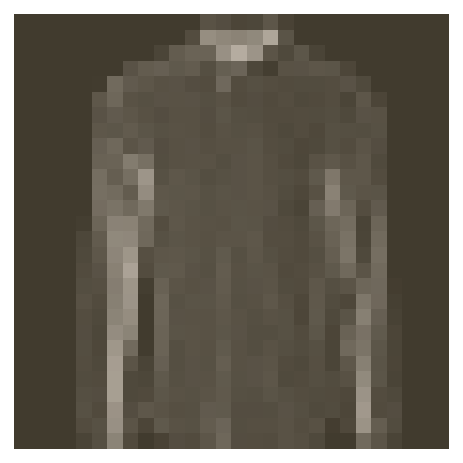

In [5]:
import helper_pt
image, label = next(iter(trainloader))
helper_pt.imshow(image[0,:]);

### Train a Model

In [0]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.721..  Test Loss: 1.036..  Test Accuracy: 0.667
Epoch: 1/2..  Training Loss: 1.069..  Test Loss: 0.778..  Test Accuracy: 0.718
Epoch: 1/2..  Training Loss: 0.902..  Test Loss: 0.661..  Test Accuracy: 0.750
Epoch: 1/2..  Training Loss: 0.791..  Test Loss: 0.662..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.761..  Test Loss: 0.629..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.726..  Test Loss: 0.602..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.704..  Test Loss: 0.583..  Test Accuracy: 0.790
Epoch: 1/2..  Training Loss: 0.716..  Test Loss: 0.566..  Test Accuracy: 0.796
Epoch: 1/2..  Training Loss: 0.661..  Test Loss: 0.560..  Test Accuracy: 0.792
Epoch: 1/2..  Training Loss: 0.630..  Test Loss: 0.546..  Test Accuracy: 0.799
Epoch: 1/2..  Training Loss: 0.656..  Test Loss: 0.531..  Test Accuracy: 0.808
Epoch: 1/2..  Training Loss: 0.639..  Test Loss: 0.537..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.609..  Test Loss: 0.5

### Saving and loading networks

In [8]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [10]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [11]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

RuntimeError: ignored

In [0]:
#This is how to save the model
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [0]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [14]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
